# Report 04
### Yuzhong Huang

In [2]:
# imports tools for solving bayes problems

from __future__ import print_function, division

import numpy as np
import math

import thinkbayes2
from thinkbayes2 import Pmf, Cdf, Suite, Joint
import thinkplot

% matplotlib inline

## The World Cup Problem from ThinkBayes

In the 2014 FIFA World Cup, Germany played Brazil in a semifinal match. Germany scored after 11 minutes and again at the 23 minute mark. At that point in the match, how many goals would you expect Germany to score after 90 minutes? What was the probability that they would score 5 more goals (as, in fact, they did)?

My solution follows

We'll use λ to represent the goal-scoring rate for Germany. To compute prior probabilities for values of λ, we'll use a Gamma distribution.

In [10]:
from scipy.special import gamma 

def EvalGammaPdf(lam, a):
    """Computes the Gamma PDF.

    lam: where to evaluate the PDF
    a: parameter of the gamma distribution

    returns: float probability
    """
    return lam**(a-1) * math.exp(-lam) / gamma(a)

In [11]:
def MakeGammaPmf(lams, a):
    """Makes a PMF discrete approx to a Gamma distribution.

    lam: parameter lambda in events per unit time
    xs: upper bound of the Pmf

    returns: normalized Pmf
    """
    pmf = Pmf()
    for lam in lams:
        pmf[lam] = EvalGammaPdf(lam, a)
        
    pmf.Normalize()
    return pmf

/home/yuzhong/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


1.3103599490022571

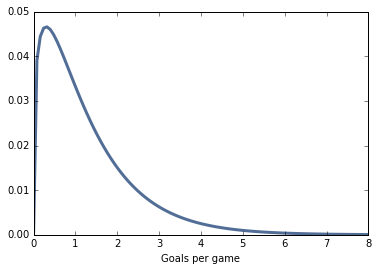

In [12]:
xs = np.linspace(0, 8, 101)
pmf = MakeGammaPmf(xs, 1.3)
thinkplot.Pdf(pmf)
thinkplot.Config(xlabel='Goals per game')
pmf.Mean()

In [13]:
class Soccer(Suite):
    """Represents hypotheses about goal-scoring rates."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: scoring rate in goals per game
        data: interarrival time in minutes
        """
        x = data / 90
        lam = hypo
        like = lam * math.exp(-lam * x)
        return like

1.3103599490022564

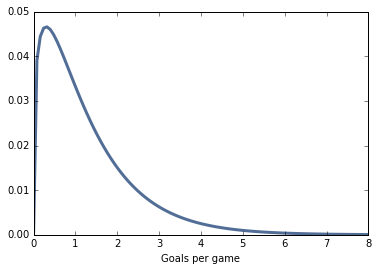

In [14]:
soccer = Soccer(pmf)
thinkplot.Pdf(soccer)
thinkplot.Config(xlabel='Goals per game')
soccer.Mean()

2.0352677560937336

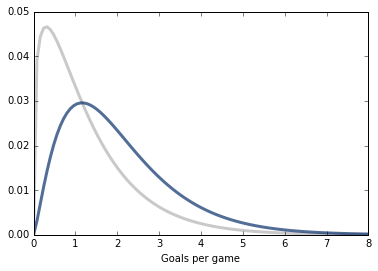

In [15]:
thinkplot.Pdf(soccer, color='0.7')
soccer.Update(11)
thinkplot.Pdf(soccer)
thinkplot.Config(xlabel='Goals per game')
soccer.Mean()

3.0589127184672193

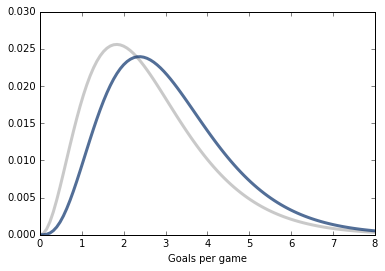

In [17]:
thinkplot.Pdf(soccer, color='0.7')
soccer.Update(12)
thinkplot.Pdf(soccer)
thinkplot.Config(xlabel='Goals per game')
soccer.Mean()

In [20]:
def EvalPoissonPmf(k, lam):
    """Computes the Poisson PMF.

    k: number of events
    lam: parameter lambda in events per unit time

    returns: float probability
    """
    return lam ** k * math.exp(-lam) / gamma(k+1)

def MakePoissonPmf(lam, high, step=1):
    """Makes a PMF discrete approx to a Poisson distribution.

    lam: parameter lambda in events per unit time
    high: upper bound of the Pmf

    returns: normalized Pmf
    """
    pmf = Pmf()
    for k in range(0, high + 1, step):
        p = EvalPoissonPmf(k, lam)
        pmf[k] = p
    pmf.Normalize()
    return pmf

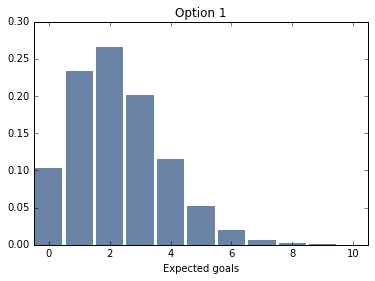

In [22]:
lam = soccer.Mean()
rem_time = 90 - 23
lt = lam * rem_time / 90
pred = MakePoissonPmf(lt, 10)
thinkplot.Hist(pred)
thinkplot.Config(title='Option 1', 
                 xlabel='Expected goals',
                 xlim=[-0.5, 10.5])

In [24]:
pred.Mean()

2.2769492163883016

In [25]:
pred.ProbGreater(4)

0.081081984981344224

## Original Problem 

Suppose there are 200 Bayesian problem on google. Some of them appear more than others. And there are 4 assignments and 20 students on a Bayesian class. Suppose for each assignment, the each student find and solve a problem on Google. Assume that of the four assignments, three of them have at least one problem that has more than one students find and solve in their work. What can we say about the appear times distribution of the 200 Bayesian problems on google?  